<a href="https://colab.research.google.com/github/pooyaphoenix/Restaurant-Revenue-Prediction/blob/main/Restaurant_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('drive/MyDrive/Datasets/Restaurant Prediction/train.csv')
df 

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


In [ ]:
df['Open Date']= pd.to_datetime(df['Open Date'])
df['month'] = df['Open Date'].dt.strftime('%-m')
df['day'] = df['Open Date'].dt.strftime('%-d')
df['Day of year'] = df['Open Date'].dt.strftime('%-j')
df[['month','day','Day of year']] = df[['month','day','Day of year']].astype(float)
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,day,Day of year
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7.0,17.0,198.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2.0,14.0,45.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3.0,9.0,68.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2.0,2.0,33.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5.0,9.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6.0,25.0,177.0
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10.0,12.0,285.0
134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7.0,8.0,189.0
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10.0,29.0,302.0


In [ ]:
df = df.drop('Open Date',1)
def converterr(dff,coll):
  possible = dff[coll].unique()
  res = {}
  for index, possible in enumerate(possible):
      res[possible] = index
  return res


In [ ]:
df['City'] = df.City.replace(converterr(df,"City"))
df['City Group'] = df['City Group'].replace(converterr(df,"City Group"))
df['Type'] = df['Type'].replace(converterr(df,"Type"))
df

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,day,Day of year
0,0,0,0,0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7.0,17.0,198.0
1,1,1,0,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2.0,14.0,45.0
2,2,2,1,0,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3.0,9.0,68.0
3,3,3,1,0,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2.0,2.0,33.0
4,4,4,1,0,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5.0,9.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,31,1,1,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6.0,25.0,177.0
133,133,9,0,1,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10.0,12.0,285.0
134,134,12,1,1,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7.0,8.0,189.0
135,135,0,0,1,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10.0,29.0,302.0


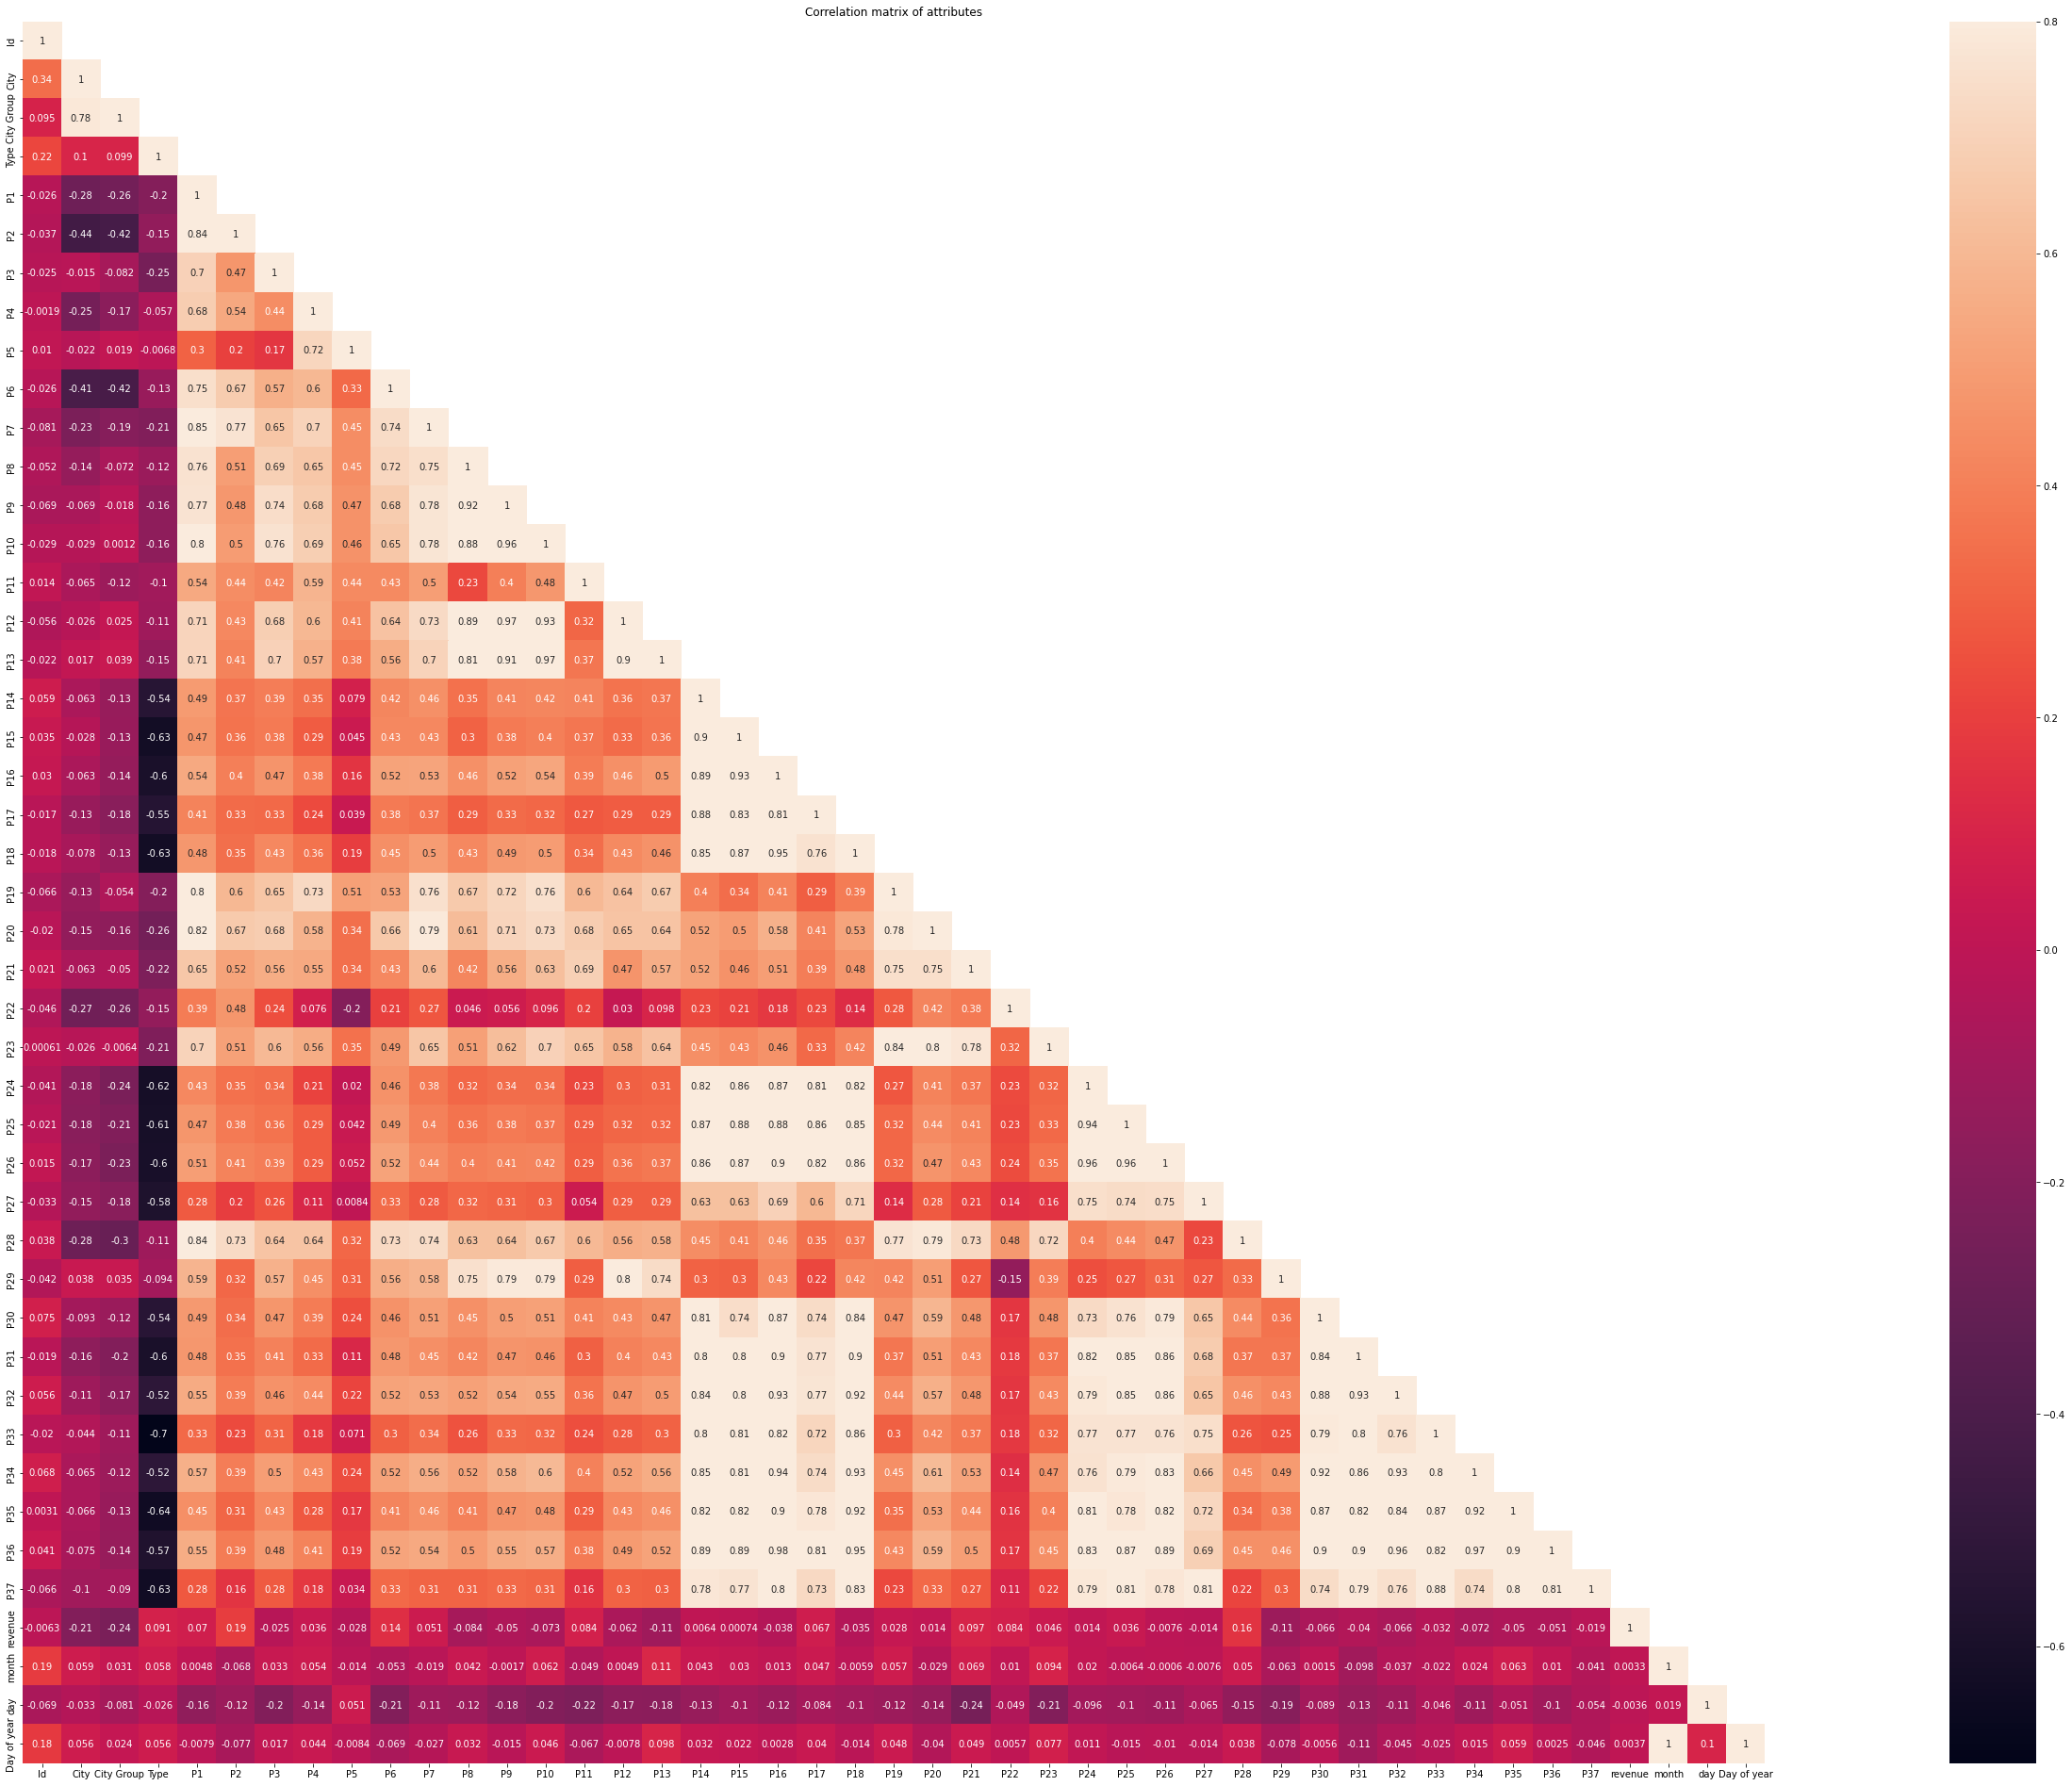

In [ ]:
correMtr=df[df.columns].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(70,34))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

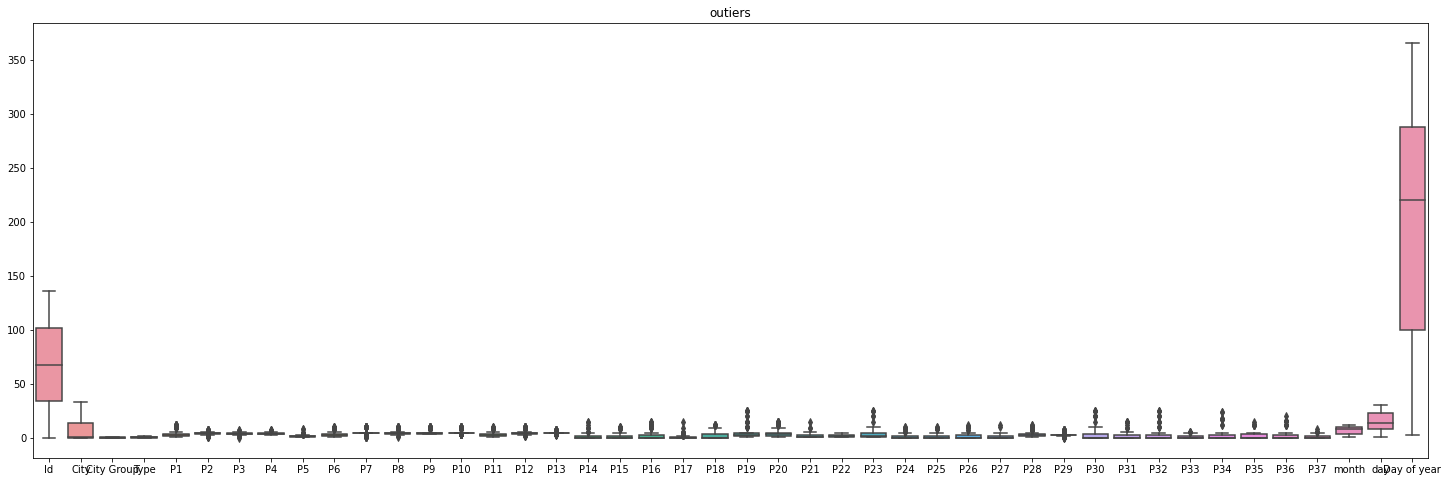

In [ ]:
fig,ax=plt.subplots(figsize=(25,8))
# outliers
custom_df = df.drop('revenue', axis=1)
sns.boxplot(data=custom_df[custom_df.columns])
ax.set_title('outiers')
plt.show()

In [ ]:
y = df['revenue']
x = df.drop(['revenue'], 1)
x

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,month,day,Day of year
0,0,0,0,0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,7.0,17.0,198.0
1,1,1,0,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,2.0,14.0,45.0
2,2,2,1,0,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,3.0,9.0,68.0
3,3,3,1,0,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2.0,2.0,33.0
4,4,4,1,0,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,5.0,9.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,31,1,1,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,6.0,25.0,177.0
133,133,9,0,1,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,10.0,12.0,285.0
134,134,12,1,1,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,7.0,8.0,189.0
135,135,0,0,1,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,10.0,29.0,302.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=26)

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn import tree
# model = GradientBoostingRegressor(random_state=0)
# model = LinearRegression()
model = xgb.XGBRegressor(
                        verbosity=0,eta=0.1, nrounds=100, max_depth=256, colsample_bytree=0.5,
                        scale_pos_weight=1.1,booster='gbtree')
    

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(colsample_bytree=0.5, eta=0.1, max_depth=256, nrounds=100,
             scale_pos_weight=1.1, verbosity=0)

In [ ]:
y_pred = model.predict(x_test)
len(y_pred)

28

In [ ]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)
rms

2541478.215226658

In [ ]:
y = df['revenue']
# x = df.drop(['revenue','Id','P2','P5','P6','P7','P9','P11','P12','P18','P1','P20','P25','P26','P27','P29','P30','P31','P32','P33','P37'], 1)
# x = df.drop(['revenue','City','City Group','P3','P5','P8','P9','P10','P12','P13','P14','P15','P16','P18','P26','P27','P29','P30','P31','P32','P33','P34','P35','P36','P37'], 1)
x = df[['City','Id', 'City Group','P1', 'P2', 'P6', 'P28', 'P23', 'P25','day']].copy()
x

,City,Id,City Group,P1,P2,P6,P28,P23,P25,day
0,0,0,0,4,5.0,2,2.0,3,1,17.0
1,1,1,0,4,5.0,2,3.0,2,0,14.0
2,2,2,1,2,4.0,3,1.0,1,0,9.0
3,3,3,1,6,4.5,4,2.5,10,2,2.0
4,4,4,1,3,4.0,2,1.0,1,3,9.0
...,...,...,...,...,...,...,...,...,...,...
132,31,132,1,2,3.0,2,2.0,1,0,25.0
133,9,133,0,4,5.0,3,3.0,1,0,12.0
134,12,134,1,3,4.0,3,2.0,2,0,8.0
135,0,135,0,4,5.0,2,3.0,1,0,29.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=26)

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn import tree
# model = GradientBoostingRegressor(random_state=0)
# model = LinearRegression()
model = xgb.XGBRegressor(
                        verbosity=0,eta=0.1, nrounds=100, max_depth=256, colsample_bytree=0.5,
                        scale_pos_weight=1.1,booster='gbtree')

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(colsample_bytree=0.5, eta=0.1, max_depth=256, nrounds=100,
             scale_pos_weight=1.1, verbosity=0)

In [ ]:
y_pred = model.predict(x_test)
len(y_pred)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)
rms

1476119.992430833

In [ ]:
print("Actual: ",y_test[10:14])
single = model.predict(x_test[10:14])
print("Prediction: ",single)

Actual:  87     5906596.0
68     3836721.0
31     2058644.0
126    4015749.0
Name: revenue, dtype: float64
Prediction:  [6627687.5 4564421.  3975118.8 4045961.8]
